# 1. Importing dependencies

In [1]:
# !pip install lightgbm
# !pip install dataprep

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import mean_absolute_error as mae
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
import random
import os
def seed_everything(seed=42): 
    random.seed(seed) 
    os.environ['PYTHONHASHSEED'] = str(seed) 
    np.random.seed(seed) 
seed_everything(42)

# 2. Loading Data

In [4]:
# Loading data
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')


In [5]:
# Preview train dataset
train.head()

,ID,channel_0_timestep_0,channel_0_timestep_1,channel_0_timestep_2,channel_0_timestep_3,channel_0_timestep_4,channel_0_timestep_5,channel_0_timestep_6,channel_0_timestep_7,channel_0_timestep_8,...,channel_13_timestep_120,channel_13_timestep_121,channel_13_timestep_122,channel_13_timestep_123,channel_13_timestep_124,channel_13_timestep_125,channel_13_timestep_126,channel_13_timestep_127,valence,arousal
0,1826,0.666593,-0.127720,0.030188,0.872432,0.066428,-0.688929,0.351763,0.962038,1.171841,...,4.268692,4.296591,0.405264,-2.827268,-2.004783,1.276288,2.222049,0.158765,5.0,6.0
1,1959,1.439036,2.939323,4.450541,4.889985,2.808758,0.174926,-0.264143,-0.265241,-2.430413,...,-2.719914,1.040441,0.272578,0.103977,3.468313,6.880353,8.626653,9.982868,1.0,7.0
2,688,-6.873479,2.620711,6.368775,-0.753867,0.504129,8.989532,6.353325,-0.452068,-1.600631,...,0.051793,-5.156834,-18.325062,2.098055,17.815147,0.043855,-3.858117,17.348724,1.0,6.0
3,765,7.343672,-1.043033,3.394326,12.075764,2.094330,-6.726448,-2.849046,-2.859351,-3.247879,...,11.696478,5.142235,-2.881666,-3.570459,-4.366352,-4.056002,-1.489292,-2.761847,2.0,8.0
4,610,8.988179,1.338421,-2.789729,-4.878788,-7.294619,-6.117245,-3.501986,-3.073579,0.061395,...,5.989770,5.809627,4.878367,3.895410,0.987760,0.012008,-0.732414,-3.816425,1.0,7.0


In [6]:
# Preview test dataset
test

,ID,channel_0_timestep_0,channel_0_timestep_1,channel_0_timestep_2,channel_0_timestep_3,channel_0_timestep_4,channel_0_timestep_5,channel_0_timestep_6,channel_0_timestep_7,channel_0_timestep_8,...,channel_13_timestep_118,channel_13_timestep_119,channel_13_timestep_120,channel_13_timestep_121,channel_13_timestep_122,channel_13_timestep_123,channel_13_timestep_124,channel_13_timestep_125,channel_13_timestep_126,channel_13_timestep_127
0,2649,0.726739,1.326801,0.419562,0.362655,1.877844,2.177589,0.881530,-0.177988,-0.107699,...,-4.538226,-6.132041,-4.516711,-4.155573,-6.451481,-5.906953,-1.217648,2.809138,5.387832,7.240309
1,1897,-2.290174,-1.321119,-4.212674,-2.404299,3.280274,5.224883,5.204860,3.618460,-2.801359,...,0.414722,3.437341,2.709642,-4.540618,-8.604247,-8.877815,-5.269321,4.677503,11.745440,11.366855
2,3973,-0.403232,-1.047966,-0.414630,-1.139564,-3.021573,-1.477372,0.307533,0.156880,0.410522,...,3.059209,0.482465,-0.488242,2.093967,0.955976,-1.962847,-0.305406,2.123710,2.303813,1.377429
3,3038,2.900014,0.531952,-1.543073,-2.262296,3.178448,5.404681,1.022172,1.415055,2.566809,...,-1.019735,1.108618,-1.554358,-6.510234,-8.960296,-3.087777,6.820467,12.740038,12.078416,2.254736
4,494,-3.372348,-1.855444,4.717225,1.641804,-8.900145,-11.168015,-9.589520,-12.598769,-9.765525,...,-12.035542,-12.719938,-9.132347,-10.269296,-6.274572,1.645681,-2.948617,-10.918031,-5.863556,-1.668832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,2334,-4.727025,1.784575,8.844007,18.653263,15.849637,5.448111,8.348645,11.207733,0.067861,...,30.436522,23.874197,6.198024,-4.351198,-3.759953,-1.290725,-4.987361,-16.255182,-21.522318,-10.641759
1238,538,10.134151,9.568485,7.262337,7.487471,6.733392,5.211767,0.310066,-6.624052,-7.355892,...,6.032307,14.483915,6.379896,1.856831,9.453686,6.004203,-11.759739,-21.103514,-14.260250,-4.076195
1239,1634,0.569240,-0.005495,-0.335056,-0.744278,-0.779166,-0.727385,-1.225391,-0.679557,1.067650,...,11.039729,4.632051,-9.030931,-8.940281,-1.969429,-6.306168,-10.082888,-5.826684,-4.915195,-3.605308
1240,2812,-2.373292,-0.077345,3.059185,4.523445,4.863350,3.648796,1.108508,-1.368233,-1.592142,...,-1.553895,-3.987797,-2.307446,-0.754247,-2.461846,-3.727754,-2.201024,2.242755,5.371719,4.585033


# 3. Data Exploration and Visualization

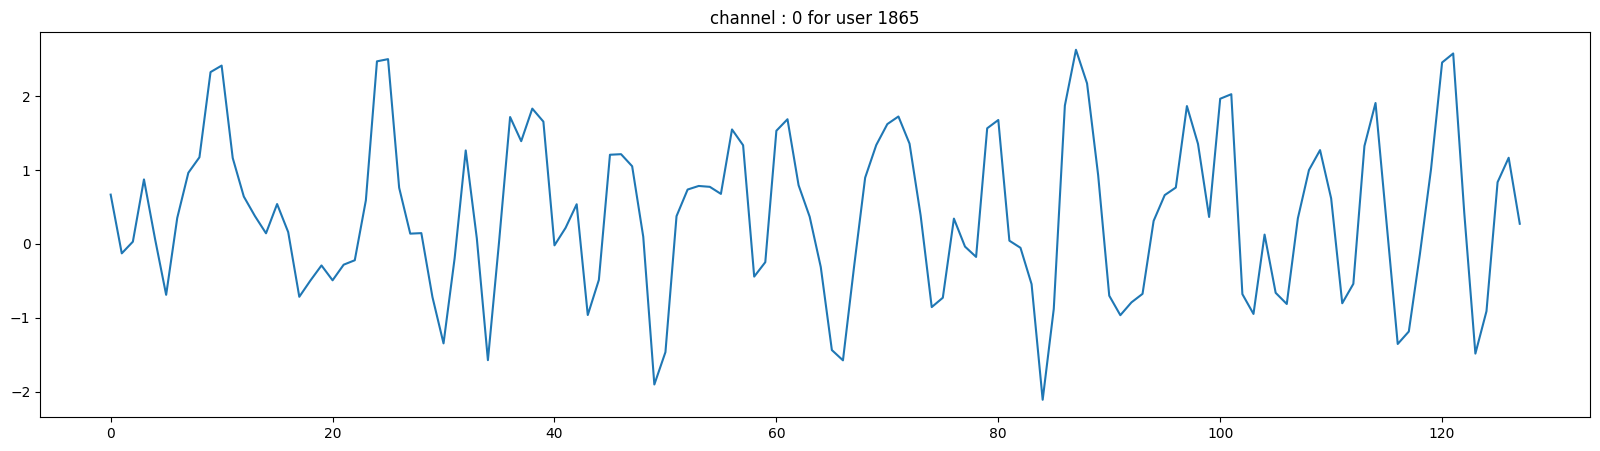

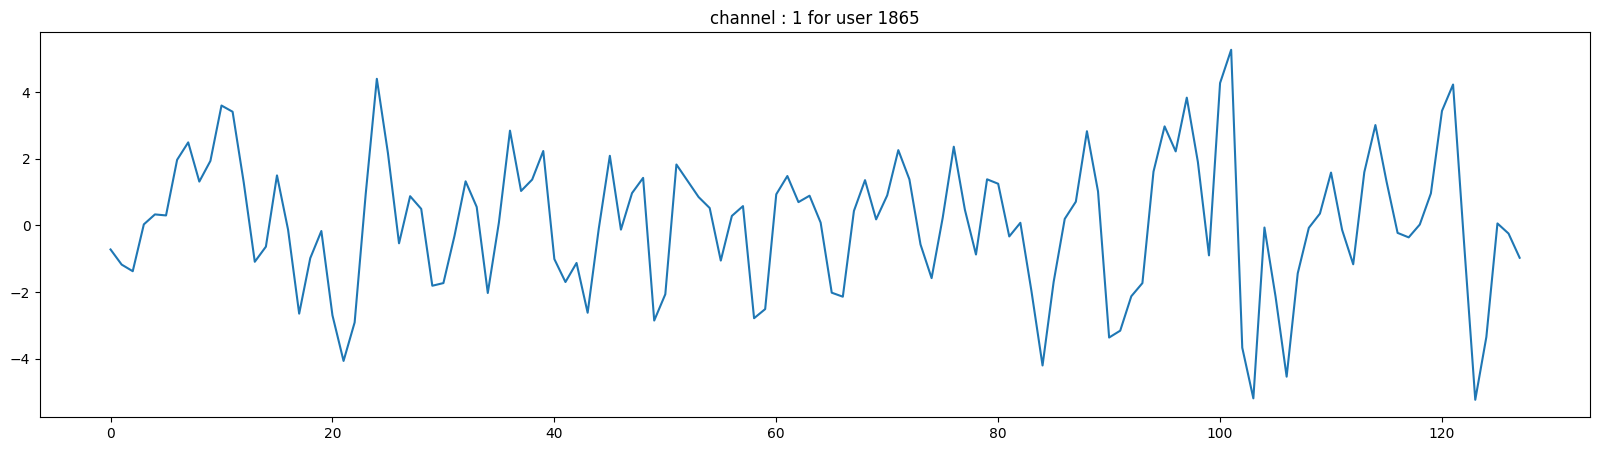

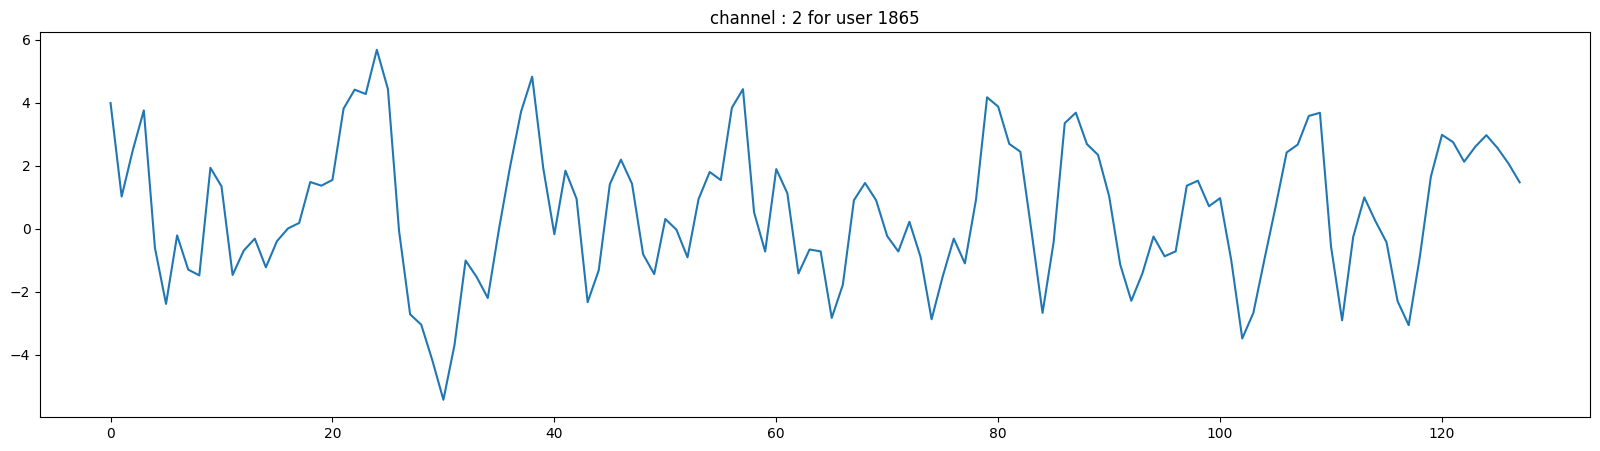

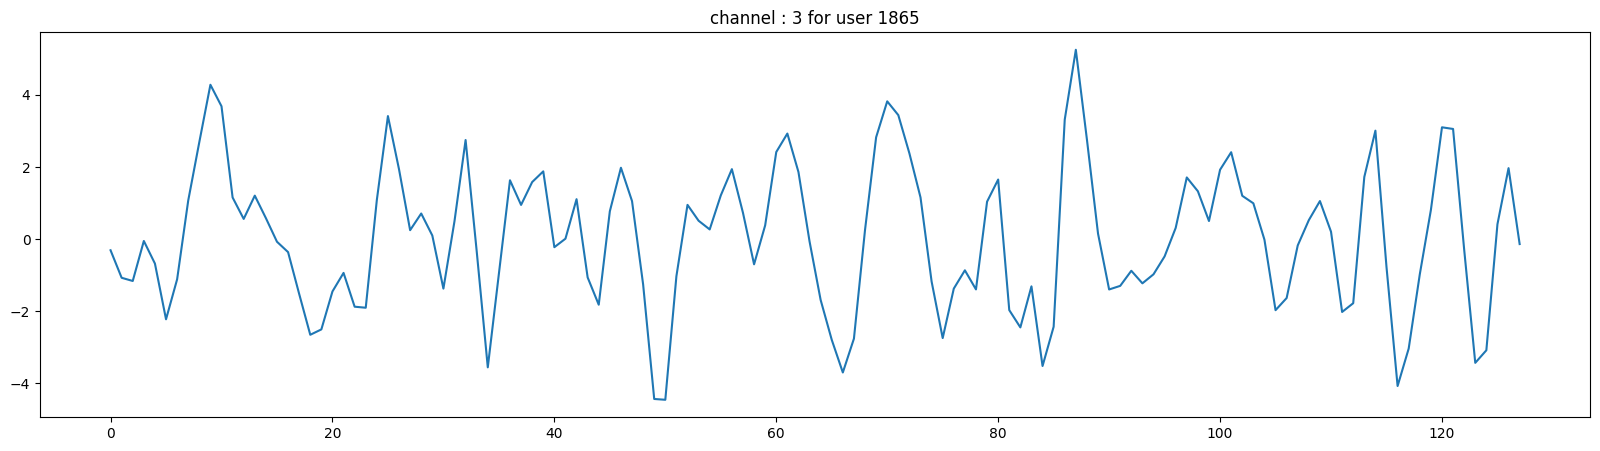

In [7]:
def ECG_analysis(Data, ID):
    for j in range(0,4):
        channels=[]
        for i in range(0,128):
            channels.append('channel_'+str(j)+'_timestep_'+str(i))
        plt.figure(figsize=(20,5))
        plt.plot(range(0,128),Data[channels].iloc[ID])
        plt.title('channel : ' + str(j) + ' for user 1865')
ECG_analysis(train, 0)

## Distributions plots and comments

In [8]:
train['valence is'] =  np.where(train['valence']<= 1, 'low', 'high')
train['arousal is'] = np.where(train['arousal']<= 3, 'low', 'high')

# 3. Statistical summaries

In [9]:
# Train statistical summary
train.describe(include = 'all')

,ID,channel_0_timestep_0,channel_0_timestep_1,channel_0_timestep_2,channel_0_timestep_3,channel_0_timestep_4,channel_0_timestep_5,channel_0_timestep_6,channel_0_timestep_7,channel_0_timestep_8,...,channel_13_timestep_122,channel_13_timestep_123,channel_13_timestep_124,channel_13_timestep_125,channel_13_timestep_126,channel_13_timestep_127,valence,arousal,valence is,arousal is
count,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,...,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898,2898
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high,high
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1760,2236
mean,2059.257764,0.389044,0.454208,0.462637,0.387329,0.371891,0.441189,0.406991,0.296707,0.376196,...,-0.104137,-0.123353,-0.189072,0.014887,0.010236,-0.203841,2.780538,5.674948,NaN,NaN
std,1194.544562,8.061950,8.067956,8.647203,8.554013,8.337875,8.407148,8.239200,8.721875,9.276640,...,11.558969,12.662207,11.722303,11.739293,11.221021,10.878963,1.709930,2.404819,NaN,NaN
min,1.000000,-88.638565,-49.717422,-76.738419,-70.990822,-44.262589,-46.824493,-64.054222,-89.342766,-82.804146,...,-260.351929,-320.710419,-210.155151,-140.127655,-129.585861,-132.911865,1.000000,1.000000,NaN,NaN
25%,1031.250000,-2.875028,-2.861511,-2.729037,-3.008328,-2.896752,-2.956476,-2.891383,-2.937266,-2.758439,...,-4.491861,-4.384882,-4.666157,-4.747908,-4.506287,-4.973101,1.000000,5.000000,NaN,NaN
50%,2052.500000,0.329112,0.442265,0.560354,0.508000,0.357536,0.364162,0.451305,0.265642,0.346212,...,-0.035296,-0.004535,-0.084537,0.053572,0.170064,-0.142523,3.000000,7.000000,NaN,NaN
75%,3089.750000,3.618194,3.605122,3.516370,3.683954,3.584133,3.764792,3.649618,3.401353,3.643734,...,4.659020,4.572749,4.566400,4.632224,4.771755,4.524043,5.000000,8.000000,NaN,NaN


# 4. Missing values

In [10]:
def missing_columns(dataframe):
    """
    Returns a dataframe that contains missing column names and 
    percent of missing values in relation to the whole dataframe.
    
    dataframe: dataframe that gives the column names and their % of missing values
    """
    
    # find the missing values
    missing_values = dataframe.isnull().sum().sort_values(ascending=False)
    
    # percentage of missing values in relation to the overall size
    missing_values_pct = 100 * missing_values/len(dataframe)
    
    # create a new dataframe which is a concatinated version
    concat_values = pd.concat([missing_values, missing_values/len(dataframe),missing_values_pct.round(1)],axis=1)

    # give new col names
    concat_values.columns = ['Missing Count','Missing Count Ratio','Missing Count %']
    
    # return the required values
    return concat_values[concat_values.iloc[:,1]!=0]

In [11]:
missing_columns(train).head(40).index

Index([], dtype='object')

In [12]:
missing_columns(test).head(5)

,Missing Count,Missing Count Ratio,Missing Count %


# 5. Pre-processing & Feature Engineering

##Feature Extraction:
We will use EEG signals to generate power bands and then other indexes such as ASI and BLI.

[4-8]Hz: theta band

[8-13]Hz: alpha band

[13-30]Hz: beta band


[25-45]Hz: gamma band

In [13]:
def calc_total(n,DataFrame):
    channels=[]
    for i in range(0,128):
        channels.append('channel_'+str(n)+'_timestep_'+str(i))
    DataFrame['std_channel_'+str(n)] =  DataFrame[channels].std(axis=1)
    DataFrame['q1_channel_'+str(n)] =  DataFrame[channels].quantile(q=0.1,axis=1)
    DataFrame['q2_channel_'+str(n)] =  DataFrame[channels].quantile(q=0.2,axis=1)
    DataFrame['q3_channel_'+str(n)] =  DataFrame[channels].quantile(q=0.3,axis=1)
    DataFrame['q4_channel_'+str(n)] =  DataFrame[channels].quantile(q=0.4,axis=1)
    DataFrame['q5_channel_'+str(n)] =  DataFrame[channels].quantile(q=0.5,axis=1)
    DataFrame['q6_channel_'+str(n)] =  DataFrame[channels].quantile(q=0.6,axis=1)
    DataFrame['q7_channel_'+str(n)] =  DataFrame[channels].quantile(q=0.7,axis=1)
    DataFrame['q8_channel_'+str(n)] =  DataFrame[channels].quantile(q=0.8,axis=1)
    DataFrame['q9_channel_'+str(n)] =  DataFrame[channels].quantile(q=0.9,axis=1)

    
    DataFrame = DataFrame.drop(columns=channels)
    
    
    return DataFrame


for i in range(0,14):
    train=calc_total(i,train)
    test=calc_total(i,test)
    
train = train.drop(['ID'],axis='columns')
test = test.drop(['ID'],axis='columns')

In [14]:
train.head()

,valence,arousal,valence is,arousal is,std_channel_0,q1_channel_0,q2_channel_0,q3_channel_0,q4_channel_0,q5_channel_0,...,std_channel_13,q1_channel_13,q2_channel_13,q3_channel_13,q4_channel_13,q5_channel_13,q6_channel_13,q7_channel_13,q8_channel_13,q9_channel_13
0,5.0,6.0,high,high,1.079372,-0.921184,-0.670085,-0.218395,0.092659,0.358199,...,2.294949,-2.709460,-1.826675,-1.186146,-0.701064,-0.093284,0.564866,1.368542,2.367223,2.926463
1,1.0,7.0,low,high,3.026420,-3.343270,-1.695489,-0.886067,-0.277202,0.374734,...,7.532506,-9.440900,-4.639735,-2.966572,-1.383055,-0.094339,1.141791,3.608065,7.021057,9.983664
2,1.0,6.0,low,high,7.322093,-8.577330,-6.206063,-3.287634,-2.064329,-0.652447,...,11.273920,-14.965158,-8.756317,-5.022458,-3.402868,-0.195952,2.510057,4.368473,9.393966,15.455546
3,2.0,8.0,high,high,5.285854,-6.002230,-3.864026,-1.861933,-1.013372,0.619180,...,4.942462,-5.513996,-4.614695,-2.484690,-1.331437,-0.772900,0.227793,2.449084,4.551273,6.453034
4,1.0,7.0,low,high,5.761645,-6.110167,-3.682830,-2.404383,-1.202972,-0.388403,...,5.135300,-7.140975,-4.605986,-3.229812,-1.537471,0.276957,1.322975,2.779864,4.333154,6.885472


In [15]:
train.to_csv('trainUpdated.csv',index=False)
test.to_csv('testUpdated.csv',index=False)


# 6. Model Building

In [23]:
scaler = Normalizer()
y_pred=[]
y = train[['valence','arousal']]
X = train.drop(['valence','arousal'],axis='columns')

X_transformed = scaler.fit_transform(X)
X = pd.DataFrame(X_transformed, columns=X.columns)
test_df_transformed = scaler.fit_transform(test)
test = pd.DataFrame(test_df_transformed, columns=test.columns)

scores_knn = []
kfold = KFold(n_splits=15, shuffle=True, random_state=42)

i=1
for train_index, test_index in kfold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    knn = MultiOutputRegressor(KNeighborsRegressor(n_neighbors = 1,  weights = 'distance', p=1))
    knn.fit(X_train, y_train)
    mean_accuracy=knn.score(X_test,y_test)
    print(mean_accuracy)
    preds=knn.predict(X_test)
    print("MAE Test ("+ str(i) +") = " + str(mae(y_test,preds)) )
    scores_knn.append((mae(y_test,preds)))
    y_pred.append(knn.predict(test))
    i +=1;

print('MAE Average : ', sum(scores_knn)/15)

plt.figure(figsize=(20,5))
plt.plot(range(0,15),scores_knn)
plt.title('MAE for each fold')


ValueError: could not convert string to float: 'high'

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
i = 1
scores_svm = []
kfold = KFold(n_splits=15, shuffle=True, random_state=42)

for train_index, test_index in kfold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    svm = MultiOutputRegressor(SVR(kernel='rbf', C=1e3, gamma=0.1))
    svm.fit(X_train, y_train)
    mean_accuracy=svm.score(X_test,y_test)
    print(mean_accuracy)
    preds=svm.predict(X_test)
    print("MAE Test ("+ str(i) +") = " + str(mae(y_test,preds)) )
    scores_svm.append((mae(y_test,preds)))
    y_pred.append(svm.predict(test))
    i +=1;

print('MAE Average : ', sum(scores_svm)/15)

plt.figure(figsize=(20,5))
plt.plot(range(0,15),scores_svm)
plt.title('MAE for each fold')

In [ ]:
RandomForestRegressor
rf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
i = 1
scores_rf = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf.fit(X_train, y_train)
    mean_accuracy=knn.score(X_test,y_test)
    print(mean_accuracy)
    preds_rf = rf.predict(X_test)
    
    print("MAE Test (RandomForest, " + str(i) + ") = " + str(mae(y_test, preds_rf)))
    scores_rf.append((mae(y_test, preds_rf)))
    
    y_pred.append(rf.predict(test))
    i += 1

print('MAE Average (RandomForest): ', sum(scores_rf) / 3)
plt.figure(figsize=(20,5))
plt.plot(range(0,3),scores_rf)
plt.title('MAE for each fold')

In [ ]:
import pickle

with open('knn_model.pkl', 'wb') as knn_file:
    pickle.dump(knn, knn_file)

with open('svm_model.pkl', 'wb') as svm_file:
    pickle.dump(svm, svm_file)

with open('random_forest_model.pkl', 'wb') as rf_file:
    pickle.dump(rf, rf_file)

# Choose the best model based on average MAE
average_mae_knn = sum(scores_knn) / 15
average_mae_svm = sum(scores_svm) / 15
average_mae_rf = sum(scores_rf) / 3

best_model_name = min(
    [("KNN", average_mae_knn), ("SVM", average_mae_svm), ("Random Forest", average_mae_rf)],
    key=lambda x: x[1]
)[0]

print("Best Model: ", best_model_name)

# Load the best model
if best_model_name == "KNN":
    with open('knn_model.pkl', 'rb') as knn_file:
        best_model = pickle.load(knn_file)
elif best_model_name == "SVM":
    with open('svm_model.pkl', 'rb') as svm_file:
        best_model = pickle.load(svm_file)
else:  # Random Forest
    with open('random_forest_model.pkl', 'rb') as rf_file:
        best_model = pickle.load(rf_file)



# 7. Predictions

In [ ]:
# Make predictions on the test data using the best model
best_model_predictions = best_model.predict(test)
print("Predictions using the best model:")
print(best_model_predictions)


In [ ]:
def generate_detailed_report(model, df):
    # text = text.decode('utf-8')
    # df = pd.read_csv(StringIO(text), delim_whitespace=True)
    prediction = model.predict(df)[0]
    print(prediction)
    valence, arousal = prediction[0], prediction[1]
    report = f"\nPrediction:\nValence: {valence}\nArousal: {arousal}\n"

    if valence < 5 and arousal > 5:
        report += "Stress: Yes\n"
        if 0 <= valence <= 2 and 7 <= arousal <= 9:
            report += "   - Severity: Severe Stress\n"
            report += "   - Description: The individual is likely experiencing intense and severe Stress.\n"
            return [valence,arousal,"SEVERE"]
            background_color = 'red'
        elif 2 < valence <= 4 and 6 <= arousal <= 7:
            report += "   - Severity: Moderate Stress\n"
            report += "   - Description: The individual is likely experiencing moderate levels of Stress.\n"
            return [valence,arousal,"MODERATE"]
            background_color = 'orange'
        elif 4 < valence <= 5 and 5 <= arousal <= 6:
            report += "   - Severity: Light Stress\n"
            report += "   - Description: The individual is likely experiencing mild or light Stress.\n"
            return [valence,arousal,"LIGHT"]
            background_color = 'yellow'
        else:
            report += "   - Severity: Normal Stress\n"
            report += "   - Description: The individual is likely experiencing normal levels of Stress.\n"
            return [valence,arousal,"NORMAL"]
            background_color = 'green'
    else:
        report += "Stress: No\n"
        report += "   - Description: The individual is not showing signs of Stress.\n"
        background_color = 'green'
        return [valence,arousal,"GOOD"]

